In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#These will get rid of "..." in output of methods like .describe()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
#returns a dataframe constructed from data of ONE device

#folderpath -       path to the data folder

#BASHLITE_only -    whether dataframe will use only BASHLITE data, or both BASHLITE and mrai.

#binary_class -     will BASHLITE and mirai get the same label or not

#equalize_classes - if this is true, BASHLITE and mirai will get squished to the size of Bening,
#                   so all classes will have roughly the same size.
def read_device_data(folderpath, BASHLITE_only=False, binary_class=True, equalize_classes=True):
    df_benign = pd.read_csv(folderpath + 'benign_traffic.csv')
    df_bashlite = [pd.DataFrame for i in range(5)]
    df_mirai = [pd.DataFrame for i in range(5)]
    df_bashlite[0] = pd.read_csv((folderpath + 'combo_bashlite.csv'))
    df_bashlite[1] = pd.read_csv((folderpath + 'junk_bashlite.csv'))
    df_bashlite[2] = pd.read_csv((folderpath + 'scan_bashlite.csv'))
    df_bashlite[3] = pd.read_csv((folderpath + 'tcp_bashlite.csv'))
    df_bashlite[4] = pd.read_csv((folderpath + 'udp_bashlite.csv'))
    if(not(BASHLITE_only)):
        df_mirai[0] = pd.read_csv((folderpath + 'ack_mirai.csv'))
        df_mirai[1] = pd.read_csv((folderpath + 'scan_mirai.csv'))
        df_mirai[2] = pd.read_csv((folderpath + 'syn_mirai.csv'))
        df_mirai[3] = pd.read_csv((folderpath + 'udpplain_mirai.csv'))
        df_mirai[4] = pd.read_csv((folderpath + 'udp_mirai.csv'))
    benign_size = df_benign.shape[0]
    print("size of benign :", benign_size)
    bashlite_size = 0
    mirai_size = 0
    for i in range(5):
        bashlite_size += df_bashlite[i].shape[0]
    print("full size of BASHLITE :", bashlite_size)
    if(not(BASHLITE_only)):
        for i in range(5):
            mirai_size += df_mirai[i].shape[0]
        print("full size of mirai :", mirai_size)
    if(equalize_classes):
        bashlite_border = bashlite_size / benign_size
        #print(bashlite_border)
        mirai_border = 0
        if(not(BASHLITE_only)):
            mirai_border = mirai_size / benign_size
            #print(mirai_border)
        for i in range(5):
            amount = int(df_bashlite[i].shape[0] // bashlite_border)
            #print(amount)
            df_bashlite[i] = shuffle(df_bashlite[i])
            df_bashlite[i].drop(df_bashlite[i].index[amount:], inplace=True)
            if(not(BASHLITE_only)):
                amount = int(df_mirai[i].shape[0] // mirai_border)
                #print(amount)
                df_mirai[i] = shuffle(df_mirai[i])
                df_mirai[i].drop(df_mirai[i].index[amount:], inplace=True)
        bashlite_size = 0
        for i in range(5):
            bashlite_size += df_bashlite[i].shape[0]
        print("squished size of BASHLITE :", bashlite_size)
        if(not(BASHLITE_only)):
            mirai_size = 0
            for i in range(5):
                mirai_size += df_mirai[i].shape[0]
            print("squished size of mirai :", mirai_size)
    df_benign['Botnet'] = 0
    df_botnet = pd.concat(df_bashlite, ignore_index=True)
    df_botnet['Botnet'] = 1
    if(not(BASHLITE_only)):
        df_botnet_mirai = pd.concat(df_mirai, ignore_index=True)
        if(binary_class):
            df_botnet_mirai['Botnet'] = 1
        else:
            df_botnet_mirai['Botnet'] = 2
        df_botnet = pd.concat([df_botnet, df_botnet_mirai], ignore_index=True)
    
    res = pd.concat([df_benign, df_botnet], ignore_index=True)
    res = shuffle(res)
    print("full dataframe size :", res.shape[0])
    return res

In [4]:
data_PT_838 = read_device_data('.\\data\\Provision_PT_838_Security_Camera\\', BASHLITE_only=True)

size of benign : 98514
full size of BASHLITE : 309040
squished size of BASHLITE : 103011
full dataframe size : 201525


In [5]:
data_PT_838.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_covariance,HH_L3_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,HH_L1_covariance,HH_L1_pcc,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_weight,HH_L0.01_mean,HH_L0.01_std,HH_L0.01_magnitude,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L5_variance,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L3_variance,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L1_variance,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Botnet
count,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,201525.000000,201525.000000
mean,29.917487,81.880372,6104.694909,46.396754,81.856786,6129.292739,125.086591,82.518669,6635.796701,1008.137333,84.688934,8187.423600,3427.023499,86.081857,9299.121879,29.917487,81.880372,6104.694909,46.396754,81.856786,6129.292739,125.086591,82.518669,6635.796701,1008.137333,84.688934,8187.423662,3427.023534,86.080534,9299.271812,27.234172,82.086502,27.133327,127.504612,27732.365570,-1634.553797,-0.004885,42.549938,81.991044,27.266400,128.817622,28466.297162,-1.894341e+03,-0.008330,116.626407,82.300943,2.896529e+01,129.349007,2.875629e+04,-2.153228e+03,-1.262545e-02,952.371596,84.041901,34.883993,125.

As we are planning to try ensembles of trees first, no data normalization is required.

In [6]:
x = data_PT_838.corr()['Botnet'].drop(['Botnet']).abs().sort_values(ascending=True)

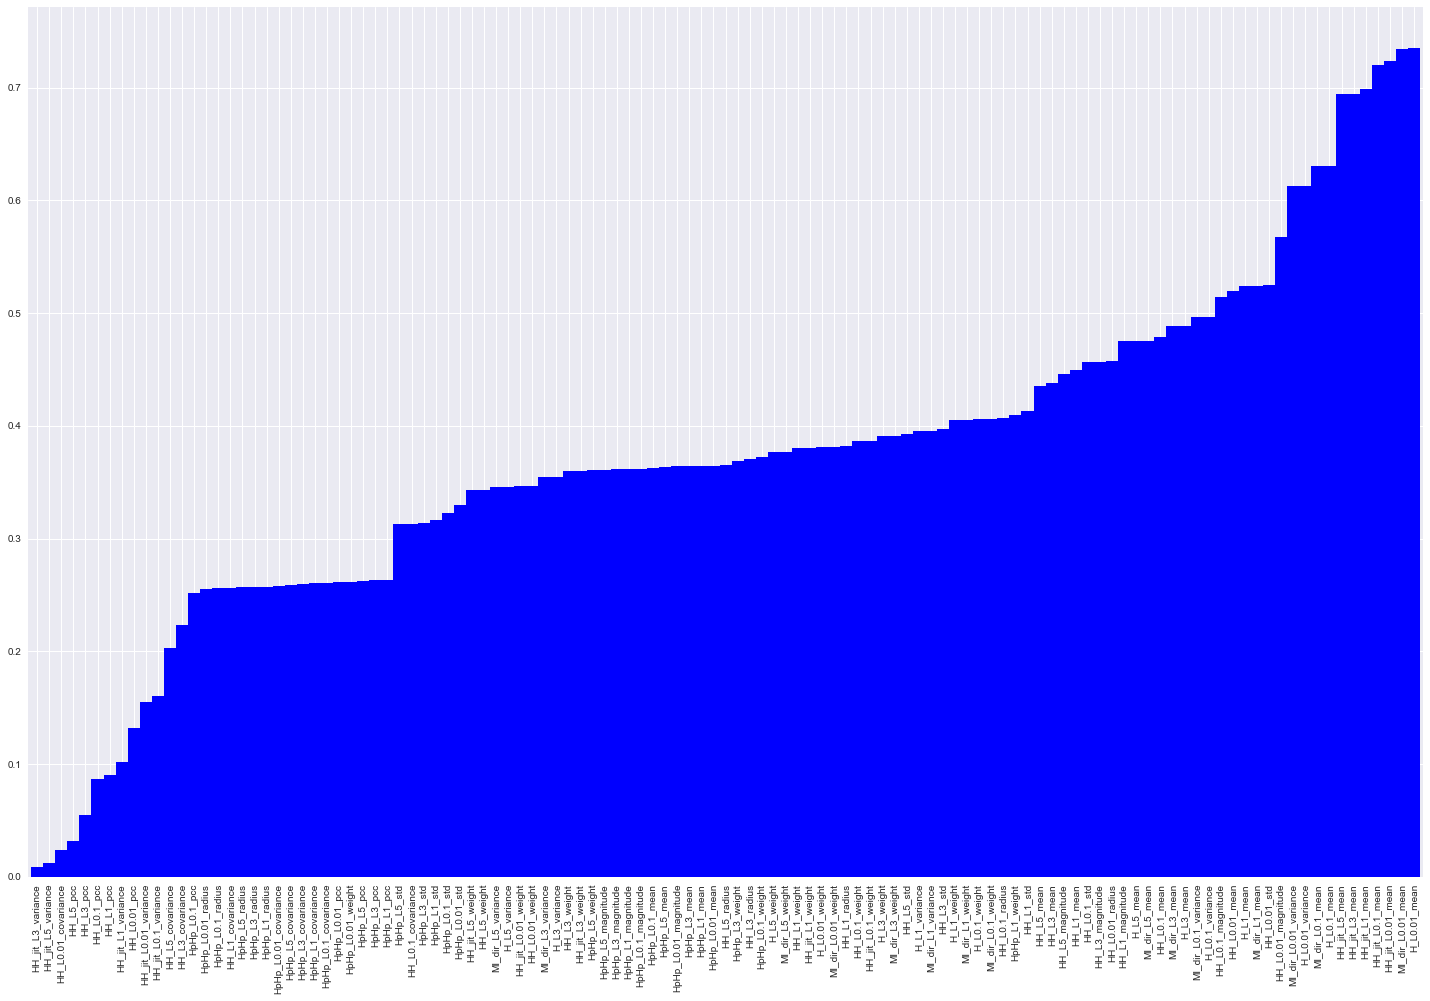

In [7]:
'''plt.figure(figsize=(20, 16))
sns.heatmap(data_PT_838.corr(), 
            linewidths=0.05, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()'''
#lol, nope
fig = plt.figure(figsize=(25, 16))
ax = fig.add_subplot(111)
x.plot(kind='bar', color='blue', ax=ax, width=1)

plt.show()

Get labels with low correlation

In [10]:
columns_low_corr = x.where(x < 0.5).dropna().index
columns_low_corr

Index(['HH_jit_L3_variance', 'HH_jit_L5_variance', 'HH_L0.01_covariance',
       'HH_L5_pcc', 'HH_L3_pcc', 'HH_L0.1_pcc', 'HH_L1_pcc',
       'HH_jit_L1_variance', 'HH_L0.01_pcc', 'HH_jit_L0.01_variance',
       'HH_jit_L0.1_variance', 'HH_L5_covariance', 'HH_L3_covariance',
       'HpHp_L0.1_pcc', 'HpHp_L0.01_radius', 'HpHp_L0.1_radius',
       'HH_L1_covariance', 'HpHp_L5_radius', 'HpHp_L3_radius',
       'HpHp_L1_radius', 'HpHp_L0.01_covariance', 'HpHp_L5_covariance',
       'HpHp_L3_covariance', 'HpHp_L1_covariance', 'HpHp_L0.1_covariance',
       'HpHp_L0.01_pcc', 'HpHp_L0.01_weight', 'HpHp_L5_pcc', 'HpHp_L3_pcc',
       'HpHp_L1_pcc', 'HpHp_L5_std', 'HH_L0.1_covariance', 'HpHp_L3_std',
       'HpHp_L1_std', 'HpHp_L0.1_std', 'HpHp_L0.01_std', 'HH_jit_L5_weight',
       'HH_L5_weight', 'MI_dir_L5_variance', 'H_L5_variance',
       'HH_jit_L0.01_weight', 'HH_L0.01_weight', 'MI_dir_L3_variance',
       'H_L3_variance', 'HH_L3_weight', 'HH_jit_L3_weight', 'HpHp_L5_weight',
       'HpH

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
tmp = data_PT_838.drop(columns_low_corr, axis=1)
y = tmp['Botnet']
X = tmp.drop(['Botnet'], axis=1)
skfold = StratifiedKFold(n_splits=10, random_state=42)
cv = skfold.split(X, y)
rfc = RandomForestClassifier(n_jobs=-1, 
                             max_features='auto' ,
                             n_estimators=50, 
                             random_state=42)
scores = cross_val_score(rfc, X, y, cv=cv, scoring='f1_micro')
print('Score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()))

Score: 1.000 ± 0.000


This is the result on BASHLITE botnet. Mirai is slightly different in how it works, so how about we'll try to train them on both botnets at the same time?

In [15]:
data_PT_838_with_mirai = read_device_data('.\\data\\Provision_PT_838_Security_Camera\\', BASHLITE_only=False)

size of benign : 98514
full size of BASHLITE : 309040
full size of mirai : 429337
squished size of BASHLITE : 103011
squished size of mirai : 107333
full dataframe size : 308858


In [16]:
x = data_PT_838_with_mirai.corr()['Botnet'].drop(['Botnet']).abs().sort_values(ascending=True)

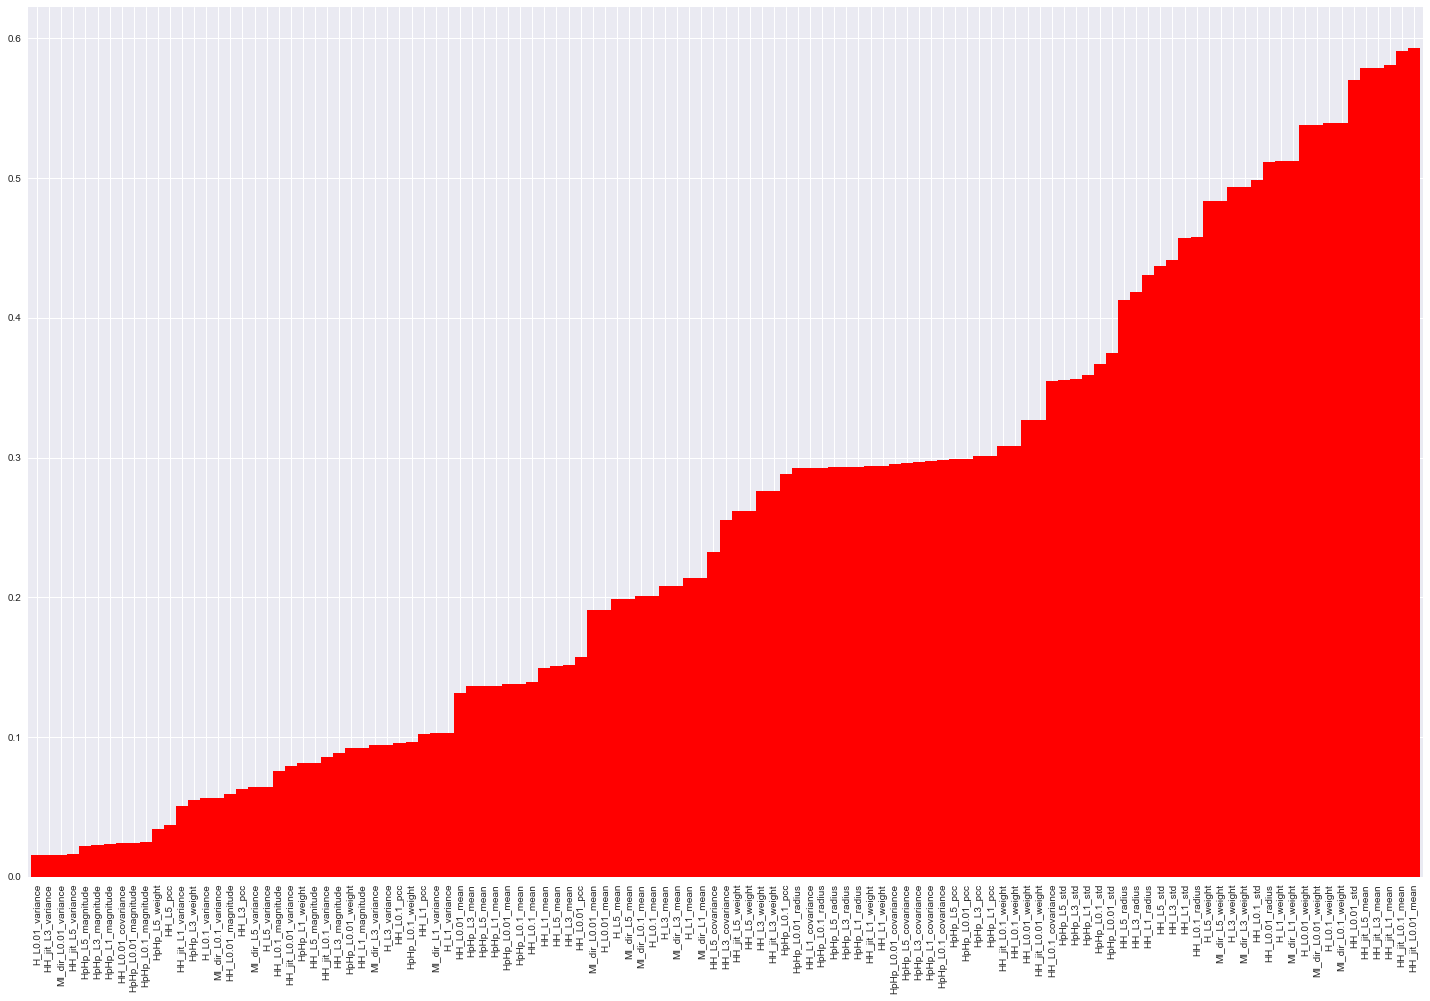

In [40]:
fig = plt.figure(figsize=(25, 16))
ax = fig.add_subplot(111)
x.plot(kind='bar', color='red', ax=ax, width=1)

plt.show()

In [18]:
columns_low_corr = x.where(x < 0.5).dropna().index
columns_low_corr

Index(['H_L0.01_variance', 'HH_jit_L3_variance', 'MI_dir_L0.01_variance',
       'HH_jit_L5_variance', 'HpHp_L5_magnitude', 'HpHp_L3_magnitude',
       'HpHp_L1_magnitude', 'HH_L0.01_covariance', 'HpHp_L0.01_magnitude',
       'HpHp_L0.1_magnitude',
       ...
       'HH_L1_radius', 'HH_L5_std', 'HH_L3_std', 'HH_L1_std', 'HH_L0.1_radius',
       'H_L5_weight', 'MI_dir_L5_weight', 'H_L3_weight', 'MI_dir_L3_weight',
       'HH_L0.1_std'],
      dtype='object', length=102)

In [19]:
tmp = data_PT_838_with_mirai.drop(columns_low_corr, axis=1)
y = tmp['Botnet']
X = tmp.drop(['Botnet'], axis=1)
skfold = StratifiedKFold(n_splits=10, random_state=42)
cv = skfold.split(X, y)
rfc = RandomForestClassifier(n_jobs=-1, 
                             max_features='auto' ,
                             n_estimators=50, 
                             random_state=42)
scores = cross_val_score(rfc, X, y, cv=cv, scoring='f1_macro')
print('Score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()))

Score: 1.000 ± 0.000


Now lets try fitting our model on a whole set of data of one device, when apply it to another device.

In [20]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

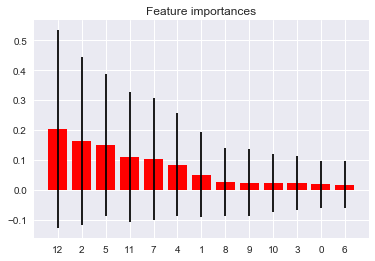

In [35]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [34]:
data_B120N10 = read_device_data('.\\data\\Philips_B120N10_Baby_Monitor\\')

size of benign : 175240
full size of BASHLITE : 312723
full size of mirai : 610714
squished size of BASHLITE : 175237
squished size of mirai : 175238
full dataframe size : 525715


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
tmp = data_B120N10.drop(columns_low_corr, axis=1)
y = tmp['Botnet']
X = tmp.drop(['Botnet'], axis=1)
y_pred = rfc.predict(X)

print("accuracy: ", accuracy_score(y, y_pred))
print("f1 macro: ", f1_score(y, y_pred, average='macro'))
print("f1 micro: ", f1_score(y, y_pred, average='micro')) 
print("f1 weighted: ", f1_score(y, y_pred, average='weighted')) 

accuracy:  0.9992904900944428
f1 macro:  0.9992014802262239
f1 micro:  0.9992904900944428
f1 weighted:  0.9992903455649736


In [38]:
data_B120N10 = read_device_data('.\\data\\Philips_B120N10_Baby_Monitor\\', equalize_classes=False)

size of benign : 175240
full size of BASHLITE : 312723
full size of mirai : 610714
full dataframe size : 1098677


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
tmp = data_B120N10.drop(columns_low_corr, axis=1)
y = tmp['Botnet']
X = tmp.drop(['Botnet'], axis=1)
y_pred = rfc.predict(X)

print("accuracy: ", accuracy_score(y, y_pred))
print("f1 macro: ", f1_score(y, y_pred, average='macro'))
print("f1 micro: ", f1_score(y, y_pred, average='micro')) 
print("f1 weighted: ", f1_score(y, y_pred, average='weighted')) 

accuracy:  0.999623183155741
f1 macro:  0.9992969034784054
f1 micro:  0.999623183155741
f1 weighted:  0.9996230767849766
